### Supermarket data science case study - Exploring first data


### Importing packages

In [36]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import altair as alt
import vegafusion as vf
import sklearn
import vega_datasets
from sklearn.pipeline import Pipeline, make_pipeline
import seaborn as sns

### Functions

In [3]:
def f_concat(l_input):

    # Initialize.
    dummy = ""
    n_len = len(l_input)

    if n_len == 1:
        return l_input[0]

    # Loop through text elements.
    for i in range(n_len - 1):
        dummy = dummy + l_input[i] + ", "

    # Append last element.
    dummy = dummy + "and " + l_input[n_len - 1]

    # Return result.
    return dummy

In [4]:
def f_describe(df_input, n_top=10):

    print("First " + str(n_top) + " rows in de data:")
    display(df_input.head(n_top))

    df_numeric = df_input.select_dtypes(
        include=[
            "uint8",
            "uint16",
            "uint32",
            "uint64",
            "int8",
            "int16",
            "int32",
            "int64",
            "float16",
            "float32",
            "float64",
        ]
    )

    if len(df_numeric.columns):
        print("Numerical data:")
        display(df_numeric.describe())

    df_textual = df_input.select_dtypes(include=["category", "object", "bool"])

    if len(df_textual.columns):
        print("Textual data:")
        display(df_textual.describe())

    v_na = [
        col
        + " ("
        + str(df[col].isna().sum())
        + ", "
        + str(round(100 * df[col].isna().sum() / df.shape[0], 1))
        + "%)"
        for col in df.columns
        if df[col].isna().sum() > 0
    ]

    if len(v_na) > 0:
        print("Features and their number of missing values:")
        display(f_concat(v_na))

### Downcast and transform data
Update formatting of features to optimize memory and standardize column names.

In [5]:
def standardize_column_names(s):
    return s.replace(" ", "")


def optimize_memory(df):
    # Change: Objects to Categorical.                                               #WHEN needed to transform Objects to Categorical?
    # object_cols = df.select_dtypes(include="object").columns
    # if not object_cols.empty:
    #     print("Change: Objects to Categorical")
    #     df[object_cols] = df[object_cols].astype("category")

    # Change: Convert integers to smallest unsigned integer and floats to smallest.
    for old, new in [("integer", "unsigned"), ("float", "float")]:
        print("Change: " + old + " --> " + new)
        for col in df.select_dtypes(include=old).columns:
            df[col] = pd.to_numeric(df[col], downcast=new)

    return df


def month_year_to_int(df, i):
    # Change: Month and Year to integer
    if i == 0:
        print("Change: Month and Year to integer")
        df = df.astype({"month": int, "year": int})

    return df

### Transform date-related columns to datetime format.

In [6]:
# Convert datasets to time series
def transform_date_to_datetime(df, i):
    if i == 0:
        print("Change: Transformed 'year', 'month', 'day' columns to Datetime feature")
        df["date"] = pd.to_datetime(df[["year", "month", "day"]], unit="us")

        print(
            "Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature"
        )
        df.drop(columns=["day", "month", "year"], inplace=True)

    else:
        if "date" in df.columns:
            print("Change: Transformed 'date' column to Datetime Dtype")
            df["date"] = pd.to_datetime(df["date"]).dt.tz_localize(None)

    return df

### Import data from local PATH
Import data trough pipeline to downcast the data and transformations

In [7]:
def f_get_data(i=0):

    # Define path.
    c_path = "/Users/Georgi/Documents/EAISI/EASI_4B_Supermarket/Group4B/data/raw/"
    # Identify file.
    v_file = (
        "history-per-year",  # 0
        "history_aggregated",  # 1
        "holidays_events",  # 2
        "items",  # 3
        "oil",  # 4
        "stores",  # 5
        "transactions",
    )  # 6

    # Load data.
    df = (
        pd.read_parquet(c_path + v_file[i] + ".parquet")
        .rename(columns=standardize_column_names)
        .pipe(optimize_memory)
        .pipe(month_year_to_int, i)
        .pipe(transform_date_to_datetime, i)
    )

    # Return data.
    return df

### Importing data

In [8]:
df = f_get_data(0)

Change: integer --> unsigned
Change: float --> float
Change: Month and Year to integer
Change: Transformed 'year', 'month', 'day' columns to Datetime feature
Change: Dropped 'year', 'month', 'day' columns and transformed to Datetime64[us] feature


In [9]:
f_describe(df)

First 10 rows in de data:


,id,store_nbr,item_nbr,unit_sales,onpromotion,date
0,0,25,103665,7.0,<NA>,2013-01-01
1,1,25,105574,1.0,<NA>,2013-01-01
2,2,25,105575,2.0,<NA>,2013-01-01
3,3,25,108079,1.0,<NA>,2013-01-01
4,4,25,108701,1.0,<NA>,2013-01-01
5,5,25,108786,3.0,<NA>,2013-01-01
6,6,25,108797,1.0,<NA>,2013-01-01
7,7,25,108952,1.0,<NA>,2013-01-01
8,8,25,111397,13.0,<NA>,2013-01-01
9,9,25,114790,3.0,<NA>,2013-01-01


Numerical data:


,id,store_nbr,item_nbr,unit_sales
count,1.254970e+08,1.254970e+08,1.254970e+08,1.254970e+08
mean,6.274852e+07,2.746458e+01,9.727692e+05,8.554879e+00
std,3.622788e+07,1.633051e+01,5.205336e+05,2.360515e+01
min,0.000000e+00,1.000000e+00,9.699500e+04,-1.537200e+04
25%,3.137426e+07,1.200000e+01,5.223830e+05,2.000000e+00
50%,6.274852e+07,2.800000e+01,9.595000e+05,4.000000e+00
75%,9.412278e+07,4.300000e+01,1.354380e+06,9.000000e+00
max,1.254970e+08,5.400000e+01,2.127114e+06,8.944000e+04


Textual data:


,onpromotion
count,103839389
unique,2
top,False
freq,96028767


Features and their number of missing values:


'onpromotion (21657651, 17.3%)'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125497040 entries, 0 to 125497039
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           uint32        
 1   store_nbr    uint8         
 2   item_nbr     uint32        
 3   unit_sales   float32       
 4   onpromotion  boolean       
 5   date         datetime64[ns]
dtypes: boolean(1), datetime64[ns](1), float32(1), uint32(2), uint8(1)
memory usage: 2.7 GB


### Some Statistics:

In [11]:
print("The data\n")
print(
    f"-> Contains:                {round(df.shape[0]/1e6, 1)} million observations and {df.shape[1]} features.\n"
)
print(
    f"-> Contains:                {df.shape[0]} observations and {df.shape[1]} features.\n"
)
print(f"-> Have feature names:      {f_concat(df.columns)}.\n")
print(f"-> Has optimized size of    {round(sys.getsizeof(df)/1024/1024/1024, 2)} GB.")

The data

-> Contains:                125.5 million observations and 6 features.

-> Contains:                125497040 observations and 6 features.

-> Have feature names:      id, store_nbr, item_nbr, unit_sales, onpromotion, and date.

-> Has optimized size of    2.69 GB.


In [12]:
# df = f_get_data(0)
# f_describe(df)

# df.head()
# df.tail(10)
df.sample(20)
# df.info()
# df.describe()
# df.nunique

,id,store_nbr,item_nbr,unit_sales,onpromotion,date
44971488,62596934,13,877513,1.0,False,2015-11-20
54125991,45644271,9,1418845,41.0,False,2015-04-28
67305926,67305926,44,1148812,50.0,False,2016-01-10
107879789,107879789,6,271479,3.0,False,2017-03-02
34945492,28424639,46,458029,3.0,False,2014-08-02
76117346,99360026,6,696183,4.0,False,2016-12-09
101218554,92055048,49,1047733,15.0,True,2016-09-25
125106025,125106025,13,2002465,3.0,True,2017-08-12
91770356,82606850,42,1456996,3.0,False,2016-06-19
74709676,97952356,22,750856,1.0,False,2016-11-25


In [13]:
df = f_get_data(1)
# f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948220 entries, 0 to 948219
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   onpromotion     948220 non-null  bool          
 1   item_nbr        948220 non-null  uint32        
 2   week            948220 non-null  uint32        
 3   date            948220 non-null  datetime64[us]
 4   unit_sales_sum  948220 non-null  float64       
 5   count           948220 non-null  uint16        
 6   family          948220 non-null  category      
 7   class           948220 non-null  uint16        
 8   perishable      948220 non-null  uint8         
dtypes: bool(1), category(1), datetime64[us](1), float64(1), uint16(2), uint32(2), uint8(1)
memory usage: 28.0 MB


,onpromotion,item_nbr,week,date,unit_sales_sum,count,family,class,perishable
844290,False,452022,201626,2015-06-26,451.0000,187,GROCERY I,1030,0
822295,False,368260,201438,2014-09-17,2490.0000,310,GROCERY I,1028,0
395006,False,1911102,201550,2015-12-10,219.0000,102,GROCERY I,1074,0
44882,False,852938,201326,2013-06-25,649.0000,157,FROZEN FOODS,2228,0
791624,False,305229,201716,2016-04-24,2360.0000,85,GROCERY I,1014,0
796196,False,312317,201728,2016-07-17,118.0000,83,AUTOMOTIVE,6810,0
136500,False,1076066,201635,2015-08-28,1206.0000,156,GROCERY I,1003,0
921561,False,671062,201610,2015-03-06,942.0000,269,DELI,2636,1
806674,False,323227,201609,2015-02-27,330.0000,171,GROCERY I,1030,0
453284,False,2086882,201731,2016-08-07,2547.0000,326,DAIRY,2166,1


In [14]:
df = f_get_data(2)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype
First 10 rows in de data:


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


Textual data:


,type,locale,locale_name,description,transferred
count,350,350,350,350,350
unique,6,3,24,103,2
top,Holiday,National,Ecuador,Carnaval,False
freq,221,174,174,10,338


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


,date,type,locale,locale_name,description,transferred
123,2014-07-09,Event,National,Ecuador,Mundial de futbol Brasil: Semifinales,False
12,2012-07-23,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False
228,2016-04-24,Event,National,Ecuador,Terremoto Manabi+8,False
76,2013-11-06,Holiday,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
13,2012-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False
145,2014-12-01,Event,National,Ecuador,Cyber Monday,False
330,2017-10-07,Holiday,Local,Quevedo,Cantonizacion de Quevedo,False
159,2015-01-01,Holiday,National,Ecuador,Primer dia del ano,False
140,2014-11-07,Holiday,Regional,Santa Elena,Provincializacion Santa Elena,False


In [89]:
df = f_get_data(3)
f_describe(df)
df.info()

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1
5,105574,GROCERY I,1045,0
6,105575,GROCERY I,1045,0
7,105576,GROCERY I,1045,0
8,105577,GROCERY I,1045,0
9,105693,GROCERY I,1034,0


Numerical data:


,item_nbr,class,perishable
count,4.100000e+03,4100.0000,4100.000000
mean,1.251436e+06,2169.6500,0.240488
std,5.876872e+05,1484.9109,0.427432
min,9.699500e+04,1002.0000,0.000000
25%,8.181108e+05,1068.0000,0.000000
50%,1.306198e+06,2004.0000,0.000000
75%,1.904918e+06,2990.5000,0.000000
max,2.134244e+06,7780.0000,1.000000


Textual data:


,family
count,4100
unique,33
top,GROCERY I
freq,1334


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   uint32
 1   family      4100 non-null   object
 2   class       4100 non-null   uint16
 3   perishable  4100 non-null   uint8 
dtypes: object(1), uint16(1), uint32(1), uint8(1)
memory usage: 60.2+ KB


In [16]:
df = f_get_data(4)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype
First 10 rows in de data:


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997
5,2013-01-08,93.209999
6,2013-01-09,93.080002
7,2013-01-10,93.809998
8,2013-01-11,93.599998
9,2013-01-14,94.269997


Numerical data:


,dcoilwtico
count,1175.000000
mean,67.714363
std,25.630476
min,26.190001
25%,46.404999
50%,53.189999
75%,95.660004
max,110.620003


Features and their number of missing values:


'dcoilwtico (43, 3.5%)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 14.4 KB


,date,dcoilwtico
1042,2016-12-29,53.799999
86,2013-05-01,90.739998
1211,2017-08-23,48.450001
1114,2017-04-10,53.060001
976,2016-09-28,47.070000
768,2015-12-11,35.650002
370,2014-06-03,103.339996
1015,2016-11-22,48.070000
169,2013-08-26,105.879997
1028,2016-12-09,51.509998


In [17]:
df = f_get_data(5)
f_describe(df)
df.info()

Change: integer --> unsigned
Change: float --> float
First 10 rows in de data:


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


Numerical data:


,store_nbr,cluster
count,54.000000,54.000000
mean,27.500000,8.481481
std,15.732133,4.693395
min,1.000000,1.000000
25%,14.250000,4.000000
50%,27.500000,8.500000
75%,40.750000,13.000000
max,54.000000,17.000000


Textual data:


,city,state,type
count,54,54,54
unique,22,16,5
top,Quito,Pichincha,D
freq,18,19,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     uint8 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     uint8 
dtypes: object(3), uint8(2)
memory usage: 1.5+ KB


In [18]:
df = f_get_data(6)
f_describe(df)
df.info()
df.sample(20)

Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype
First 10 rows in de data:


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


Numerical data:


,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  uint8         
 2   transactions  83488 non-null  uint16        
dtypes: datetime64[ns](1), uint16(1), uint8(1)
memory usage: 897.0 KB


,date,store_nbr,transactions
6269,2013-05-18,4,1708
8932,2013-07-13,50,3190
22490,2014-05-01,7,1652
30025,2014-10-08,12,1172
7367,2013-06-10,24,2367
52839,2016-01-12,27,1366
27690,2014-08-20,7,1891
62,2013-01-03,16,1101
19150,2014-02-18,37,1446
12965,2013-10-08,6,1514


In [69]:
df = f_get_data(6)

Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype


In [ ]:
# alt.data_transformers.enable("default")
# alt.data_transformers.disable_max_rows()


##aggregated_df = df.groupby("date").sum().reset_index()

#print(
    f"-> Contains:                {df.shape[0]} observations and {df.shape[1]} features.\n"
)

#print(
#    f"-> Contains:                {aggregated_df.shape[0]} observations and {aggregated_df.shape[1]} features.\n"
#)

#aggregated_df2 = df.groupby(["date", "store_nbr"]).sum().reset_index()
#print(
    f"-> Contains:                {aggregated_df2.shape[0]} observations and {aggregated_df2.shape[1]} features.\n"
)


#print(1682 / 5)
# aggregated_df.head(20)

#print(df.dtypes)
#print(aggregated_df.dtypes)

In [88]:
df = f_get_data(6)
sns.set_theme()

#df['year'] = pd.to_datetime(df['date'])
# Extract the year and add it as a new column 'year'
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['year_month'] = df['date'].dt.to_period('M')
monthly_sum = df.groupby('year_month','store_nbr')['transactions'].sum().reset_index()
#store_1=monthly_sum[monthly_sum["store_nbr"].isin([1])]
monthly_sum.head()
#store_1.head() #Here I simply check if everything goes ok.





Change: integer --> unsigned
Change: float --> float
Change: Transformed 'date' column to Datetime Dtype


ValueError: No axis named store_nbr for object type DataFrame

/Users/Georgi/Documents/Group4B/venv_case_project/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Georgi/Documents/Group4B/venv_case_project/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Georgi/Documents/Group4B/venv_case_project/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/Georgi/Documents/Group4B/venv_case_project/lib/python3.10/site-packages/seaborn/_oldcor

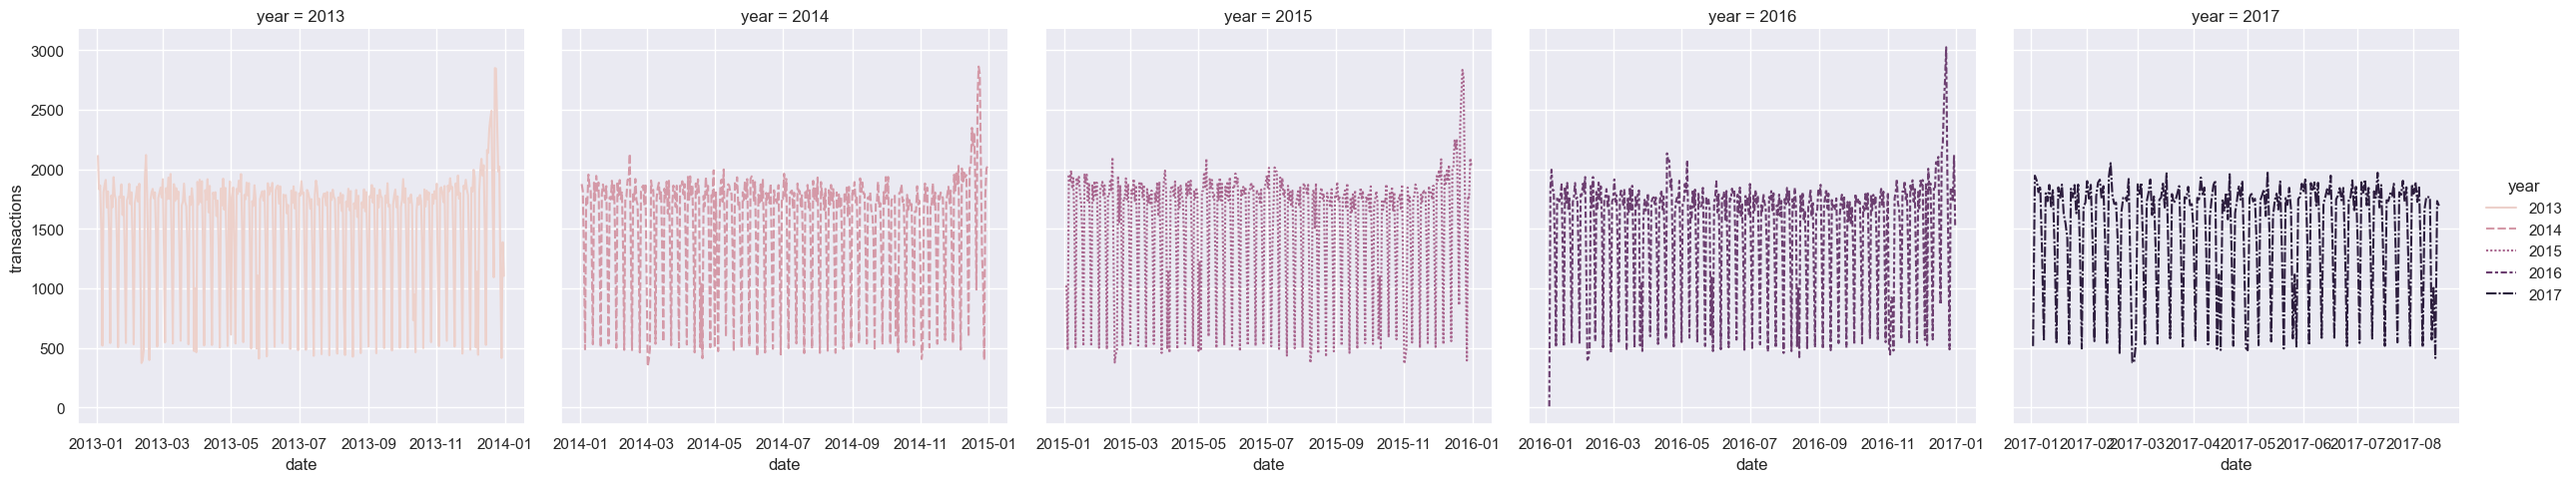

In [63]:
sns.relplot(
    data=store_1, kind="line",
    x="date", y="transactions", hue="year", style="year"
       , col="year", facet_kws={'sharex': False}     )

In [ ]:
# Enable the Vegafusion transformer and disable the maximum rows limit
vf.enable()
alt.data_transformers.enable("vegafusion")
alt.data_transformers.disable_max_rows()
aggregated_df = df.groupby("date").sum().reset_index()

chart = (
    alt.Chart(aggregated_df)
    .mark_circle()
    .encode(x="date:T", y="transactions:Q")  # , color="store_nbr:N") #Dtype = uint64
    .properties(width=1200, height=480)
    .interactive()
)

chart  # .display()

In [ ]:
# Enable the Vegafusion transformer and disable the maximum rows limit
vf.enable()
alt.data_transformers.enable("vegafusion")
# alt.data_transformers.disable_max_rows()

# Enable Vegafusion and set a higher row limit
vf.enable(row_limit=100000)
alt.data_transformers.enable("vegafusion")

filtered_df = df[df["date"].dt.year == 2014]

df["store_nbr"] = df["store_nbr"].astype("category")

chart = (
    alt.Chart(filtered_df)
    .mark_circle()
    .encode(x="date:T", y="transactions:Q", color="store_nbr:N")  # Dtype = uint64
    .properties(width=1200, height=480)
    .interactive()
)


chart  # .display()